In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten


In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

#### To convert pixel value to image we can do as follow

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

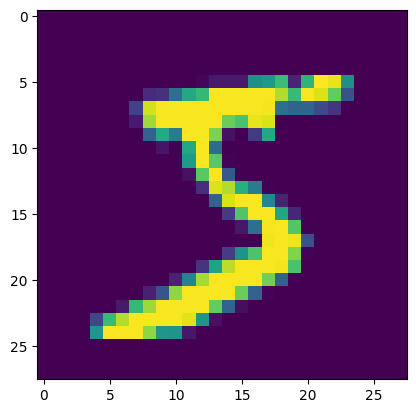

In [8]:
plt.imshow(x_train[0])

#### No to converge the values that ranges betwen the 0-255 between 0 and 1 and for this we will divide each value with 255

In [9]:
x_train = x_train/255
x_test = x_test/255

In [10]:
np.round(x_train, 8)
np.round(x_test, 8)

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [11]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

In [25]:
history = model.fit(x_train,y_train, epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0087 - val_loss: 0.1026
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0064 - val_loss: 0.1134
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0059 - val_loss: 0.1076
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0065 - val_loss: 0.1219
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0048 - val_loss: 0.1161
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0054 - val_loss: 0.1218
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0053 - val_loss: 0.1273
Epoch 8/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0027 - val_loss: 0.1216
Epoch 9/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0055 - val_loss: 0.1285
Epoch 10/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0

In [26]:
probability_y = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [27]:
probability_y

array([[7.90994511e-19, 1.40218501e-15, 1.52187117e-12, ...,
        1.00000000e+00, 6.35896051e-15, 9.12813018e-15],
       [1.09400444e-13, 1.36601536e-10, 1.00000000e+00, ...,
        2.49831214e-22, 1.68662962e-14, 1.52097554e-33],
       [2.58081417e-10, 9.99972701e-01, 1.30442468e-05, ...,
        1.02533695e-05, 3.81968221e-06, 7.12523152e-10],
       ...,
       [3.82374401e-27, 8.12281081e-24, 2.13238763e-26, ...,
        1.64873540e-13, 1.01408343e-14, 1.11528078e-11],
       [1.70850733e-18, 1.65570633e-28, 5.30582722e-27, ...,
        1.28953952e-20, 2.13631213e-11, 3.72028602e-23],
       [3.24500175e-16, 2.02097329e-22, 2.99734060e-14, ...,
        5.28082903e-27, 1.69261316e-19, 2.00739751e-21]], dtype=float32)

In [28]:
y_pred = probability_y.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [30]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9788

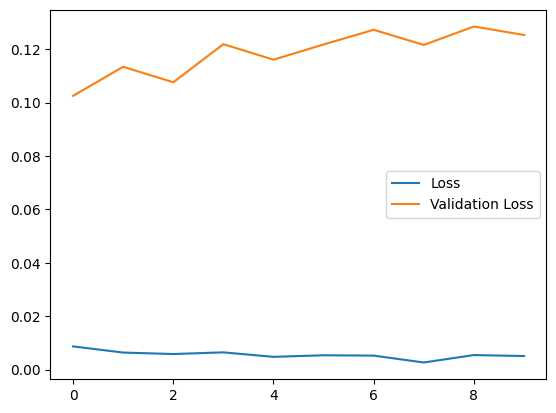

In [34]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(labels = ['Loss','Validation Loss'])

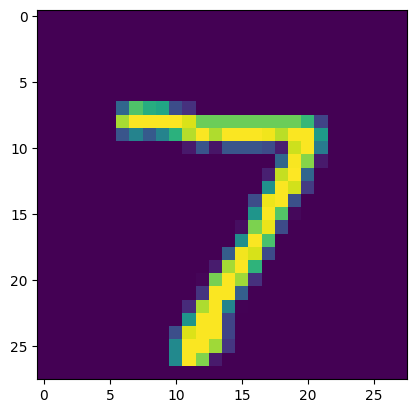

In [36]:
plt.imshow(x_test[0])

In [41]:
y_Pred0 = model.predict(x_test[0].reshape(1,28,28)).argmax(axis = 1)
y_Pred0

1/1 [==============================] - 0s 30ms/step


array([7], dtype=int64)

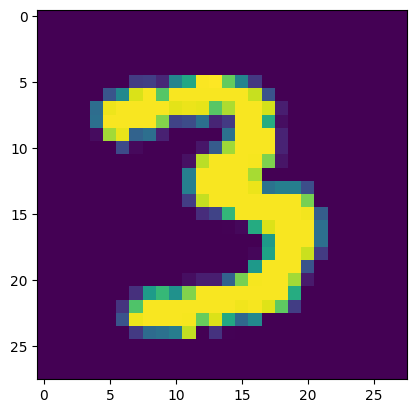

In [42]:
plt.imshow(x_test[500])

In [46]:
ypred500 = model.predict(x_test[500].reshape(1,28,28)).argmax(axis = 1)
ypred500

1/1 [==============================] - 0s 87ms/step


array([3], dtype=int64)